<a href="https://colab.research.google.com/github/eria-GitHub/ep1/blob/main/Pycaret_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing Survival on Titanic dataset**



A really good friend of mine is a historian, looking to write an article about the Titanic. She has been studying the Titanic for years and knows a lot about its history. She knows a lot of facts about the infamous boat and recently got her hands into the original passenger manifest. So far, she has not been able to uncover the insights hidden in the passengers of the Titanic.

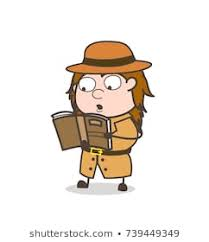

We on the other hand, are experienced data scientists, that understand data and discover useful insights, so let’s work together to find patterns of passengers that survived vs. those that pesrished. I have some gut feeling on why certain passengers survived and others perished but I would prefer to use a data driven approach. Do you think you can help me? 


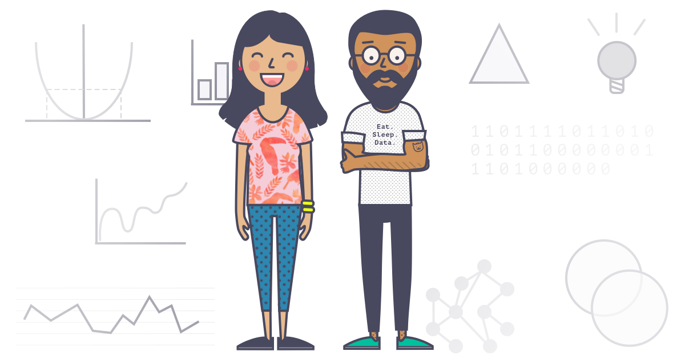

**A bit of history...**

Everyone knows the story of the Titanic, as most of us have seen the movie by James Cameron, where Rose, a woman travelling in 1st class falls in love with Jack, a man travelling in 3rd class. 



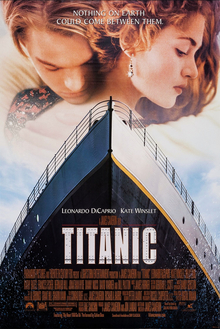

RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early hours of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City.

There were an estimated 2,224 passengers and crew aboard, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history.

After leaving Southampton on 10 April 1912, Titanic called at Cherbourg in France and Queenstown (now Cobh) in Ireland before heading west to New York. 


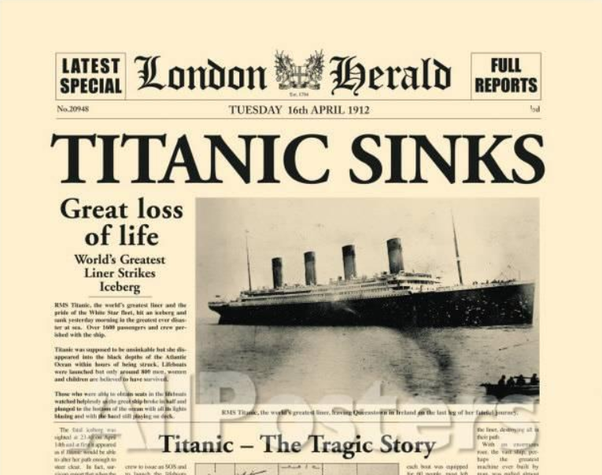

**Let’s begin…**

Install pandas

But what is pandas?

Pandas is an open-source Python Library providing high-performance data manipulation and analysis tool using its powerful data structures.

In [ ]:
import pandas as pd

Load data

In [ ]:
# Import data from github repository
url = "https://raw.githubusercontent.com/eria-GitHub/ep1/main/Titanic.csv"
data = pd.read_csv(url)

Let’s spend a minute to explore what is in this dataset

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


It is always good practice to look at all the headings and create what is called a data dictionary. I have already created this. Below we can find the data dictionary, that includes all 12 variables. From now on we will refer to them as features. Let’s spend some time to go though them and understand what kind of information they include. We can also start thinking which of these will be better for predicting survival. 

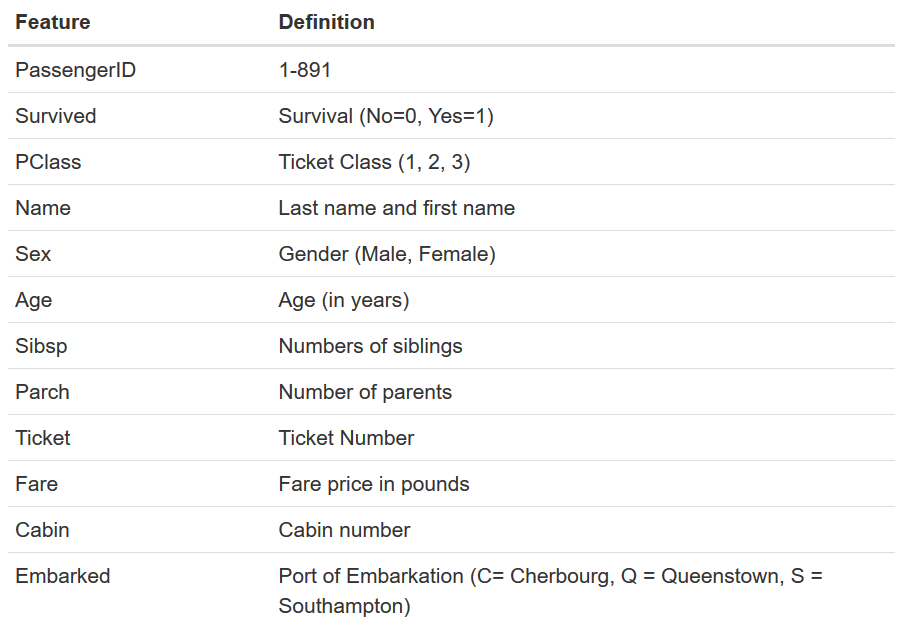

# **Exploratory Analytics**


We have now have read our data set, removed any missing values, looked into the data dictionary and know a few more things on the passengers’ features. In order to answer our main question we have to start exploring our dataset by answering some more basic questions.


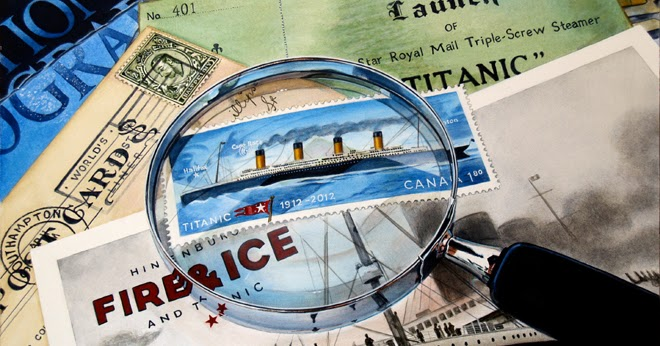


Let’s start exploring! 

**Question 1: How many men and women were on board?**



In [ ]:
data.Sex.value_counts ()

male      577
female    314
Name: Sex, dtype: int64

**Question 2: What is the percentage of people that survived?**

In [ ]:
#trunc(addmargins(table(inputdata.Survived),1) *100 /nrow(inputdata))
# round python


#data.loc[data['Sex'] == 'male', 'Survived'].mean()
data.loc[data['Survived']].mean()

PassengerId     1.383838
Survived        0.383838
Pclass          2.232323
Age            28.141414
SibSp           1.000000
Parch           0.000000
Fare           31.828438
dtype: float64

**Question 3: What is the distribution of the age of passengers?**

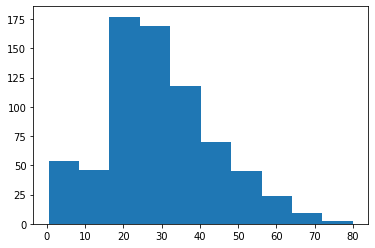

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data.Age, bins = 10)
plt.show()

**Question 4: How many passengers were in each class?**

In [ ]:
data.Pclass.value_counts ()

3    491
1    216
2    184
Name: Pclass, dtype: int64

 We can of course spend a lot of time exploring our data set. After the basic exploration we just completed we feel confident that we have a good view of our dataset and we are ready to apply some advanced analytics. Before we begin with advanced analytics, let’s remember what we have found out already.

- There were almost double the amount of men than women on board.

- Around 60% of the passengers perished.

- The majoity of the passengers were between 20-30 years of age.

- Half of the passengers were travelling in 3rd class, while more people were travelling in 1st than 2nd class.



**Advanced Analytics** 

We have been asked to find patterns for the passengers that survived vs. those that pesrished. We can already make assumptions on which of the features predcit better the survival rate. What do you think? Which of the features is better for predicting survival? 

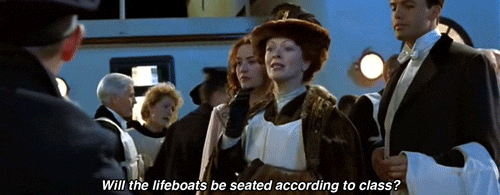

As data scientists, we are already thinking of the many possible ways we can asnwer this question. Today we will try **pycaret**, an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment.



In [ ]:
#Install pycaret
! pip install pycaret[full]

**Set up preprocessing**

Pycaret offers a lot of built-in preprocessing options.

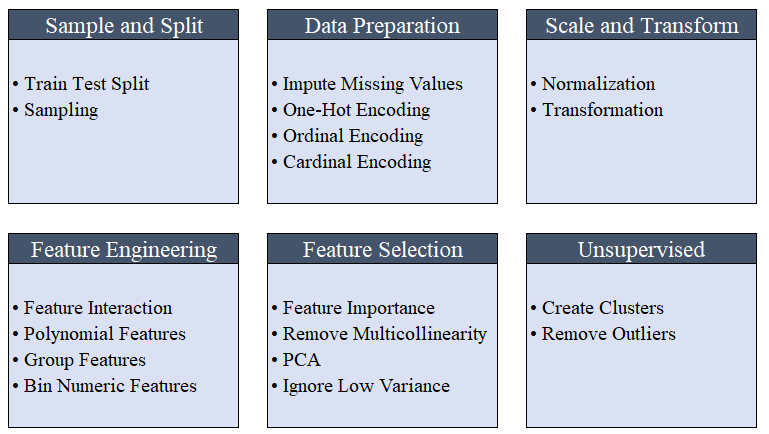

In [ ]:
# Define target variable
# Remove variables that are not considered important
# train/test split is set to 70/30 

from pycaret.classification import *
clf1 = setup(data, target = 'Survived', ignore_features = ['Ticket', 'Name', 'PassengerId'], silent = True, session_id = 42) 

,Description,Value
0,session_id,42
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(891, 12)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


**Compare models**

This function trains all the models in the model library and compares the common evaluation metrics using k-fold cross validation (by default 10 folds). The evaluation metrics used are:

For Classification: Accuracy, AUC, Recall, Precision, F1, Kappa



In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8379,0.8579,0.6585,0.8752,0.7487,0.6334,0.6491,1.515
gbc,Gradient Boosting Classifier,0.8283,0.8569,0.6629,0.8428,0.7399,0.6149,0.6263,0.167
ada,Ada Boost Classifier,0.8202,0.8279,0.7406,0.7714,0.7548,0.6129,0.6141,0.136
lda,Linear Discriminant Analysis,0.8186,0.8402,0.6975,0.7929,0.7408,0.6023,0.6064,0.035
ridge,Ridge Classifier,0.8154,0.0000,0.6975,0.7838,0.7371,0.5958,0.5990,0.020
lr,Logistic Regression,0.8105,0.8460,0.6799,0.7802,0.7258,0.5824,0.5861,0.457
lightgbm,Light Gradient Boosting Machine,0.8091,0.8558,0.7016,0.7662,0.7297,0.5831,0.5869,0.102
xgboost,Extreme Gradient Boosting,0.8059,0.8510,0.7145,0.7548,0.7316,0.5801,0.5829,2.659
et,Extra Trees Classifier,0.7995,0.8269,0.7060,0.7441,0.7233,0.5665,0.5681,0.498
rf,Random Forest Classifier,0.7978,0.8466,0.6929,0.7537,0.7180,0.5613,0.5660,0.523


**Create the best model**

Creating a model in any module of PyCaret is as simple as writing create_model. It takes only one parameter i.e. the model name passed as string input. This function returns a table with k-fold cross validated scores and a trained model object.

In [ ]:
best = create_model('catboost')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.7981,0.5417,0.8125,0.6500,0.4966,0.5185
1,0.8095,0.8027,0.6087,0.8235,0.7000,0.5650,0.5789
2,0.8889,0.9228,0.7826,0.9000,0.8372,0.7535,0.7577
3,0.9355,0.9041,0.8261,1.0000,0.9048,0.8566,0.8656
4,0.8387,0.8294,0.5652,1.0000,0.7222,0.6206,0.6707
5,0.7581,0.7553,0.5217,0.7500,0.6154,0.4471,0.4628
6,0.8387,0.8662,0.6522,0.8824,0.7500,0.6349,0.6507
7,0.7903,0.8919,0.6522,0.7500,0.6977,0.5384,0.5415
8,0.8226,0.8339,0.6522,0.8333,0.7317,0.6021,0.6122
9,0.9194,0.9744,0.7826,1.0000,0.8780,0.8191,0.8329


**Tune the best model**

The tune_model function is used for automatically tuning hyperparameters of a machine learning model. PyCaret uses random grid search over a predefined search space. This function returns a table with k-fold cross validated scores and a trained model object.

In [ ]:
tuned_best = tune_model(best, optimize = 'AUC', n_iter = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.7842,0.5417,0.8125,0.6500,0.4966,0.5185
1,0.7937,0.8147,0.6087,0.7778,0.6829,0.5333,0.5421
2,0.9048,0.9250,0.7826,0.9474,0.8571,0.7867,0.7948
3,0.9194,0.9019,0.7826,1.0000,0.8780,0.8191,0.8329
4,0.7903,0.8317,0.4783,0.9167,0.6286,0.5019,0.5534
5,0.7903,0.7631,0.5217,0.8571,0.6486,0.5115,0.5435
6,0.8226,0.8395,0.6087,0.8750,0.7179,0.5945,0.6154
7,0.7742,0.8852,0.5652,0.7647,0.6500,0.4888,0.5010
8,0.7903,0.8317,0.5652,0.8125,0.6667,0.5208,0.5391
9,0.8871,0.9643,0.7391,0.9444,0.8293,0.7468,0.7593


In [ ]:
predictions = predict_model(tuned_best)
print(predictions)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.806,0.8778,0.6486,0.8471,0.7347,0.586,0.5989


           Age       Fare  Pclass_1  ...  Survived  Label   Score
0    29.256353  15.245800       0.0  ...         1      0  0.8287
1    31.000000  10.500000       0.0  ...         0      0  0.8582
2    20.000000   7.925000       0.0  ...         0      0  0.8773
3     6.000000  33.000000       0.0  ...         1      1  0.8613
4    14.000000  11.241700       0.0  ...         1      1  0.5353
..         ...        ...       ...  ...       ...    ...     ...
263  27.000000   8.662500       0.0  ...         1      0  0.8945
264  29.256353   0.000000       1.0  ...         0      0  0.8509
265  65.000000  26.549999       1.0  ...         0      0  0.6790
266  17.000000   8.662500       0.0  ...         0      0  0.8765
267  28.000000  26.549999       1.0  ...         1      0  0.6681

[268 rows x 133 columns]


In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
! pip install shap

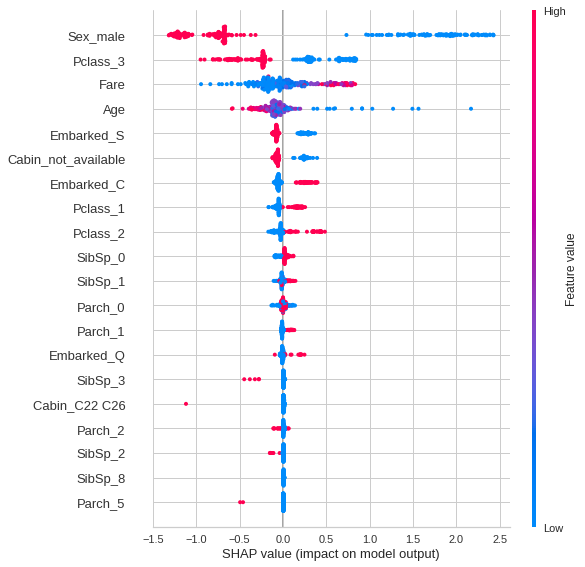

In [ ]:
interpret_model(best)
#Shap values are only available for tree based models

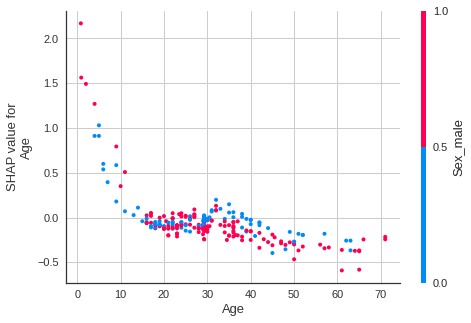

In [ ]:
interpret_model(best,  plot = 'correlation')